## Impact dari Spending Time Electronic Gadget vs CGPA 

#### Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Import data 

In [2]:
df = pd.read_csv("The Impact of Electronic Gadget Uses with Academic Performance among University Students (Responses) - Form Responses 1.csv", delimiter = ",")

#### Understanding Data

In [3]:
pd.set_option("display.max_columns", None)
print(df.shape)
df.head()

(30, 9)


,Timestamp,Gender,Your study year,Which department,How many electronic devices do you use?,What is your recent latest CGPA ?,Is there an increase in your CGPA?,Average hour you spent using electronic devices for academic purposes in a day (hours).,What is the purpose of buying the device?
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


#### Membuang kolom yang tidak perlu

In [4]:
df = df.drop("Timestamp", axis =1) # Menghapus kolom timestamp

#### Mengganti nama kolom agar memudahkan analisis

In [5]:
# Rename Nama kolom
df = df.rename(columns={"Your study year":"Study_Year", "Which department":"Department", 
        "How many electronic devices do you use?":"Many_Device_Use", "What is your recent latest CGPA ?":"CGPA", 
        "Is there an increase in your CGPA?":"CGPA_increase", 
        "Average hour you spent using electronic devices for academic purposes in a day (hours).":"Spending_Time", 
        "What is the purpose of buying the device?":"Buying_Purpose"}) # Mengganti nama kolom 

df.head()

,Gender,Study_Year,Department,Many_Device_Use,CGPA,CGPA_increase,Spending_Time,Buying_Purpose
0,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


#### Tujuan

1. Banyak elektronik dengan GPA (increase/tidak) seberapa increase
2. spending time vs GPA
3. spending time vs increase GPA
4. major with highest spending time 

#### Mencari Null Value

In [6]:
df.isna().sum() # Output tidak ada null value

Gender             0
Study_Year         0
Department         0
Many_Device_Use    0
CGPA               0
CGPA_increase      0
Spending_Time      0
Buying_Purpose     0
dtype: int64

#### Exploratory Data Analysis

#### 1. Banyak elektronik digunakan dengan CGPA (increase/tidak), seberapa increase

In [7]:
df.head(5)

tb1 = df[["Many_Device_Use", "CGPA", "CGPA_increase"]] # Mengambil kolom yang diperlukan saja

tb1 = (tb1.groupby(["Many_Device_Use", "CGPA_increase"]).agg({"CGPA_increase":"count"})
        .rename(columns = {"CGPA_increase":"Count"})
        .reset_index())

tb1 = tb1.pivot(index = "Many_Device_Use", columns = "CGPA_increase", values = "Count")
tb1 = tb1.fillna(value=0).astype(int) # Merubah nilai Na dan mengganti tipe data value menjadi int agar mudah terbaca
tb1


CGPA_increase,Increase,None,decrease
Many_Device_Use,,,
1,1,0,0
2,7,7,2
3,2,3,3
4,1,1,3


Membuat grafik no 1

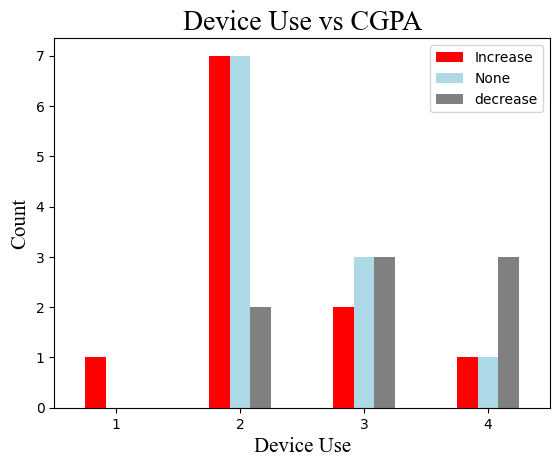

In [8]:
# Membuat bar grafik untuk memvisualisasikan hasil 
tb1.plot(kind="bar", 
color = {"Increase":"r", "decrease":"grey", "None":"#ADD8E6"})
plt.xlabel("Device Use", fontdict={"fontname": "Times New Roman", "fontsize": 15})
plt.ylabel("Count", fontdict={"fontname": "Times New Roman", "fontsize": 15})
plt.title("Device Use vs CGPA", fontdict={"fontname": "Times New Roman", "fontsize": 20})
plt.xticks(rotation=0)
plt.legend()
plt.rc("legend", fontsize=10)
plt.show()

Semakin banyak device yang digunakan, CGPA yang dihasilkan mengalami penurunan yang meningkat. 


#### 2. spending time vs GPA

In [9]:
df.head() # melihat data

tb2 = (df.groupby(["Spending_Time", "CGPA_increase"])
        .agg({"CGPA_increase":"count"})
        .rename(columns = {"Spending_Time":"Time", "CGPA_increase":"Count"})
        .reset_index())

# Mapping ke kolom spending time agar dapat diurutkan dengan sort values
tb2["Spending_Time"] = tb2["Spending_Time"].map({"1-3":0, "4-6":1, "7-9":2, "10-12":3, "13-15":4})
tb2 = tb2.sort_values(by="Spending_Time")

tb2 = tb2.pivot(index="Spending_Time", columns = "CGPA_increase", values="Count")
tb2 = tb2.rename(index={0:"1-3", 1:"4-6", 2:"7-9", 3:"10-12", 4:"13-15"}) # Merubah nama kolom
tb2 = tb2.fillna(value=0).astype(int)
tb2

CGPA_increase,Increase,None,decrease
Spending_Time,,,
1-3,1,1,2
4-6,6,1,1
7-9,0,6,3
10-12,3,3,2
13-15,1,0,0


Membuat grafik no 2

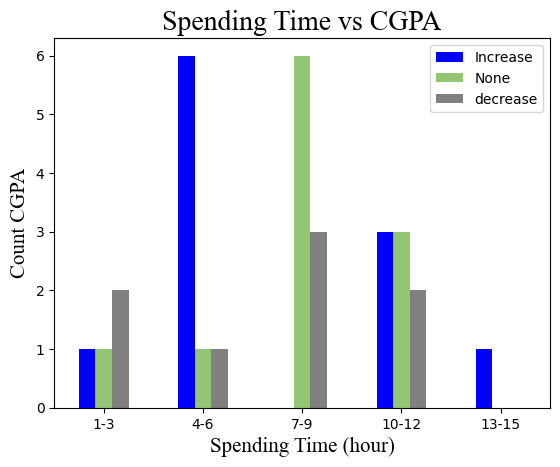

In [10]:
tb2.plot(kind="bar",
color = {"Increase":"blue", "decrease":"grey", "None":"#93C572"})

plt.xlabel("Spending Time (hour)", fontdict={"fontname": "Times New Roman", "fontsize": 15})
plt.ylabel("Count CGPA", fontdict={"fontname": "Times New Roman", "fontsize": 15})
plt.title("Spending Time vs CGPA", fontdict={"fontname": "Times New Roman", "fontsize": 20})
plt.xticks([0,1,2,3,4], ["1-3", "4-6", "7-9", "10-12", "13-15"], rotation = 0)
plt.legend()
plt.rc("legend", fontsize=10)
plt.show()

#### Statistik lamanya waktu digunakan dengan peningkatan CGPA 

In [11]:
# Stats Class yang berguna untuk summary dari lamanya waktu yang digunakan dengan kenaikan CGPA

class Stats:

    # Mengambil kolom yang diperlukan 
    tb3 = df[["Department", "CGPA_increase", "Spending_Time"]] 

    def __init__(self, parameter):
        # parameter dimasukan fungsi above/below 7
        self.parameter = parameter


    def Summary(self):
        
        Increase = 0
        Decrease = 0
        Nonee = 0

        summ = self.tb3[self.tb3["Spending_Time"].isin(self.parameter)]

        for i in summ["CGPA_increase"]:
            if i == "Increase":
                Increase += 1
            elif i == "decrease":
                Decrease += 1
            else:
                Nonee += 1
        
        persen_increase = Increase / len(self.tb3["CGPA_increase"]) * 100
        persen_decrease = Decrease / len(self.tb3["CGPA_increase"]) * 100
        persen_stabil = Nonee / len(self.tb3["CGPA_increase"]) * 100


        print( 
            f"{self.parameter}\n",
            f"Banyak yang meningkat\t: {Increase}, dengan Persen Increase\t: {persen_increase:.2f} %\n",
            f"Banyak yang menurun\t: {Decrease}, dengan Persen Decrease\t: {persen_decrease:.2f} %\n",
            f"Banyak yang stabil\t: {Nonee}, dengan Persen None\t\t: {persen_stabil:.2f} %\n")

# Jika spending time lebih dari 7 jam 
above7 = ["7-9", "10-12", "13-15"] 
Above = Stats(above7)
Above.Summary()

# Jika spending time kurang dari 7 jam
below7 = ["1-3", "4-6"] 
Below = Stats(below7)
Below.Summary()




['7-9', '10-12', '13-15']
 Banyak yang meningkat	: 4, dengan Persen Increase	: 13.33 %
 Banyak yang menurun	: 5, dengan Persen Decrease	: 16.67 %
 Banyak yang stabil	: 9, dengan Persen None		: 30.00 %

['1-3', '4-6']
 Banyak yang meningkat	: 7, dengan Persen Increase	: 23.33 %
 Banyak yang menurun	: 3, dengan Persen Decrease	: 10.00 %
 Banyak yang stabil	: 2, dengan Persen None		: 6.67 %



<p style='text-align: justify;'>
Lamanya waktu yang digunakan pada gadget di atas 7 jam tidak terlalu efektif, karena terdapat penurunan CGPA, dengan 16,67%. Peningkatan CGPA terjadi ketika penggunaan gadget kurang dari 7 jam, dengan persen banyak peningkatan 23,33 % </p>

#### Gender Summary CGPA increase

In [12]:
gender_CGPA = df[["Gender", "Spending_Time", "CGPA_increase", "CGPA"]]

gender_CGPA = (df.groupby(["Gender", "CGPA_increase"])
                .agg({"CGPA_increase":"count"})
                .rename(columns = {"CGPA_increase":"Count"}))

gender_CGPA

Count
Gender CGPA_increase       
Female Increase           3
       None               4
       decrease           4
Male   Increase           8
       None               7
       decrease           4

#### Gender with most spending time

In [13]:
df.head() # Melihat data

tb4 = (df.groupby(["Gender", "Spending_Time"])
        .agg({"Spending_Time":"count"})
        .rename(columns={"Spending_Time":"Count"})
        .reset_index())

tb4 = tb4.pivot(index="Gender", columns="Spending_Time", values="Count")
tb4 = tb4[["1-3", "4-6", "7-9", "10-12", "13-15"]] # Mengurutkan kolom
tb4 = tb4.fillna(value=0).astype(int) # Mengisi Na value dan merubah tipe data menjadi int
tb4

Spending_Time,1-3,4-6,7-9,10-12,13-15
Gender,,,,,
Female,1,4,4,2,0
Male,3,4,5,6,1


#### Major Spending Time

In [14]:
df.head()

tb5 = (df.groupby(["Department", "Spending_Time"])
        .agg({"Spending_Time":"count"})
        .rename(columns={"Spending_Time":"Count"})
        .reset_index())

tb5 = tb5.pivot(index="Department", columns="Spending_Time", values="Count")
tb5 = tb5[["1-3", "4-6", "7-9", "10-12", "13-15"]] # Mengurutkan kolom
tb5 = tb5.fillna(value=0).astype(int) 
tb5["total_student"] = tb5.sum(axis=1)
tb5

Spending_Time,1-3,4-6,7-9,10-12,13-15,total_student
Department,,,,,,
Allied Health Sciences,0,0,1,1,0,2
Architecture & Built Environment,0,1,0,2,0,3
Business Management,1,2,3,0,0,6
Creative Industries,1,1,1,1,0,4
Education & Liberal Studies,0,1,0,2,0,3
Engineering,2,0,1,1,0,4
Hospitality & Tourism,0,0,2,0,1,3
Information Technology,0,3,1,1,0,5


#### Kesimpulan
<p style='text-align: justify;'> 
1. Jika jumlah device yang digunakan meningkat maka terdapat penurunan CGPA yang.
Berdasarkan grafik 1, penurunan CGPA meningkat seiring bertambahnya gadget yang digunakan. </p>
<p style='text-align: justify;'> 
2. spending time vs CGPA, berdasarkan grafik 2 tidak dapat terlihat terlalu jelas apa yang dapat disimpulkan.
Namun, berdasarkan perhitungan statistik dengan Class Stats diperoleh: lamanya waktu yang digunakan pada gadget di atas 7 jam tidak terlalu efektif, karena terdapat penurunan CGPA. penurunan CGPA sebesar 16,67%. Terjadinya 
peningkatan CGPA_decrease di atas 7 jam vs di bawah 7 jam sebanyak 6,67%.  
Peningkatan CGPA terjadi ketika penggunaan gadget kurang dari 7 jam, dengan persen CGPA_increase sebesar: 23,33%.
meskipun begitu, banyak juga mahasiswa yang stabil CGPA-nya meskipun belajar di atas 7 jam. diperlukan sampel data 
yang lebih banyak sehinggaa diperoleh kesimpulan yang valid, dan dapat diprediksi penurunan, peningkatan berdasarkan
spending time. </p>
  